In [1]:
mode = 3

n = 10000
p = 0.9

n_neutral = 200

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import tensorflow as tf

if mode == 1:
    from Heuristics import heuristic_1 as heuristic
    from Sample import sample_1 as sample
elif mode == 2:
    from Heuristics import heuristic_2 as heuristic
    from Sample import sample_2 as sample
elif mode == 3:
    from Heuristics import heuristic_3 as heuristic
    from Sample import sample_3 as sample

from Explore import explore
from Heuristics import augment
from Load import load
from Model import get_model, loss

from Core import acc
from Train import train

In [3]:
# Create the datasets

X_train, X_val, X_test, X_neutral, Y_train, Y_val, Y_test, Y_neutral, meta_train, meta_val, meta_test = \
load(sample, n, p, n_neutral)

In [4]:
# Train a model on the 'bad' dataset and evaluate on both

model = get_model()
train(model, loss, X_train, Y_train, X_val, Y_val, "Models/original")
print()
print("Training Distribution Test Acc: ", acc(model, X_test, Y_test))
print("Neutral Distribution Test Acc: ", acc(model, X_neutral, Y_neutral))

Epoch / Epoch Train Loss / Val Loss: 0 0.43362278 0.3728675 -> saving
Epoch / Epoch Train Loss / Val Loss: 1 0.35454947 0.3535472 -> saving
Epoch / Epoch Train Loss / Val Loss: 2 0.33459717 0.3621421
Epoch / Epoch Train Loss / Val Loss: 3 0.32952872 0.34576675 -> saving
Epoch / Epoch Train Loss / Val Loss: 4 0.31789893 0.34538674 -> saving
Epoch / Epoch Train Loss / Val Loss: 5 0.31199384 0.37387207
Epoch / Epoch Train Loss / Val Loss: 6 0.30578426 0.3426369 -> saving
Epoch / Epoch Train Loss / Val Loss: 7 0.2865105 0.36058974
Epoch / Epoch Train Loss / Val Loss: 8 0.2832491 0.33934048 -> saving
Epoch / Epoch Train Loss / Val Loss: 9 0.2653888 0.36376378
Epoch / Epoch Train Loss / Val Loss: 10 0.26309615 0.33927724
Epoch / Epoch Train Loss / Val Loss: 11 0.25177592 0.36340228
Dropping learning_rate
Epoch / Epoch Train Loss / Val Loss: 12 0.20525816 0.3070525 -> saving
Epoch / Epoch Train Loss / Val Loss: 13 0.19018124 0.3544944
Epoch / Epoch Train Loss / Val Loss: 14 0.18580276 0.32367


4


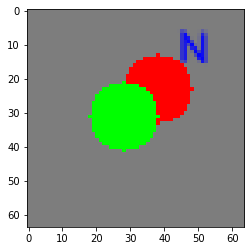

Initial Prediction:  [[ True]]


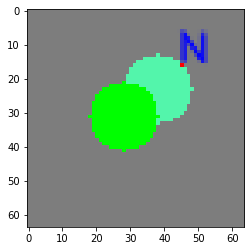

New Prediction:  [[False]]


6


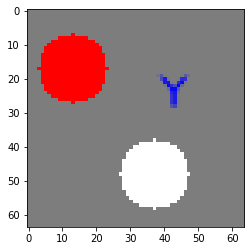

Initial Prediction:  [[ True]]


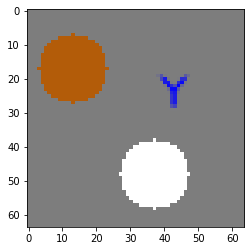

New Prediction:  [[False]]


10


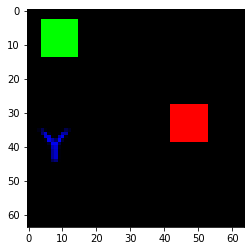

Initial Prediction:  [[ True]]


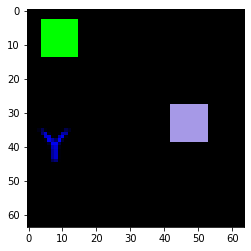

New Prediction:  [[False]]

Hit max_display


In [5]:
# Check the heuristic's effectiveness

model.load_weights("Models/original")
explore(model, X_train, Y_train, meta_train, heuristic)

In [6]:
# Augment the training dataset using the heuristic

X_train_aug, Y_train_aug = augment(X_train, Y_train, meta_train, heuristic)
X_val_aug, Y_val_aug = augment(X_val, Y_val, meta_val, heuristic)

In [7]:
# Fine-tune the model on the augmented data

model.load_weights("Models/original")
train(model, loss, X_train_aug, Y_train_aug, X_val_aug, Y_val_aug, "Models/new")
print()
print("Training Distribution Test Acc: ", acc(model, X_test, Y_test))
print("Neutral Distribution Test Acc: ", acc(model, X_neutral, Y_neutral))

Epoch / Epoch Train Loss / Val Loss: 0 0.4850363 0.5277232 -> saving
Epoch / Epoch Train Loss / Val Loss: 1 0.4415842 0.495459 -> saving
Epoch / Epoch Train Loss / Val Loss: 2 0.40040374 0.4836794 -> saving
Epoch / Epoch Train Loss / Val Loss: 3 0.34750256 0.45388636 -> saving
Epoch / Epoch Train Loss / Val Loss: 4 0.2915159 0.36920536 -> saving
Epoch / Epoch Train Loss / Val Loss: 5 0.24290901 0.37327698
Epoch / Epoch Train Loss / Val Loss: 6 0.21036395 0.3233716 -> saving
Epoch / Epoch Train Loss / Val Loss: 7 0.1813694 0.28765294 -> saving
Epoch / Epoch Train Loss / Val Loss: 8 0.15990785 0.28155714 -> saving
Epoch / Epoch Train Loss / Val Loss: 9 0.12692833 0.28632554
Epoch / Epoch Train Loss / Val Loss: 10 0.11343573 0.30774745
Epoch / Epoch Train Loss / Val Loss: 11 0.10011043 0.23857713 -> saving
Epoch / Epoch Train Loss / Val Loss: 12 0.10111649 0.2543281
Epoch / Epoch Train Loss / Val Loss: 13 0.07411732 0.31677458
Epoch / Epoch Train Loss / Val Loss: 14 0.0740876 0.35805246
D

Searching Training Set

42


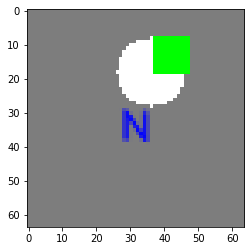

Initial Prediction:  [[False]]


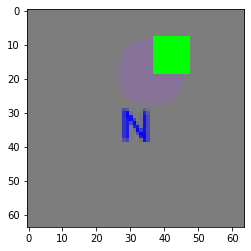

New Prediction:  [[ True]]

Searched  100  images
Searching Testing Set

34


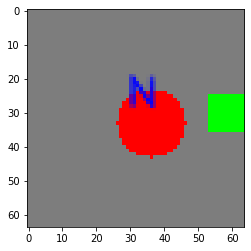

Initial Prediction:  [[False]]


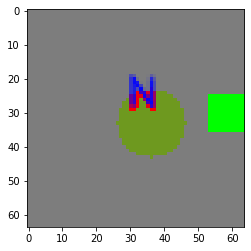

New Prediction:  [[ True]]


44


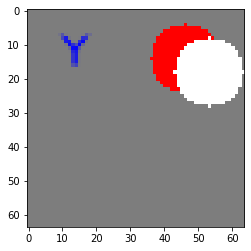

Initial Prediction:  [[False]]


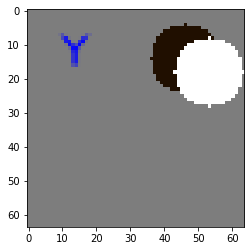

New Prediction:  [[ True]]


57


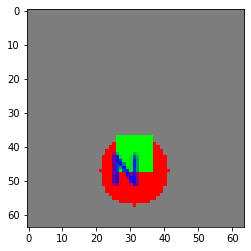

Initial Prediction:  [[ True]]


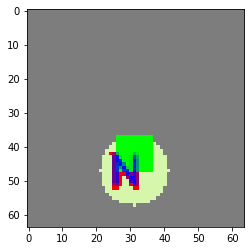

New Prediction:  [[False]]

Hit max_display


In [8]:
# Check the heuristic's effectiveness on the new model

model.load_weights("Models/new")
print("Searching Training Set")
explore(model, X_train, Y_train, meta_train, heuristic)
print("Searching Testing Set")
explore(model, X_test, Y_test, meta_test, heuristic)